In [24]:
# libraries
import random
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.optimizers.legacy.SGD import SGD
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import load_model
from keras.models import Sequential
from keras import optimizers
import numpy as np
import pickle
import json
import nltk
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
words = []
classes = []
documents = []
ignore_words = ["?", "!"]
data_file = open("intentsz.json").read()
intents = json.loads(data_file)

In [27]:
for intent in intents["intents"]:
    for pattern in intent["patterns"]:

        # take each word and tokenize it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # adding documents
        documents.append((w, intent["tag"]))

        # adding classes to our class list
        if intent["tag"] not in classes:
            classes.append(intent["tag"])


In [28]:
# lemmatizer
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(" ")
print(len(classes), "classes : - ", classes)
print(" ")
print(len(words), "unique lemmatized words", words)


704 documents
 
138 classes : -  ['ArecanutsFertilizer', 'ArecanutsIrrigation', 'ArecanutsLocation', 'ArecanutsMaturity_time', 'ArecanutsPesticide', 'ArecanutsRainfall', 'ArecanutsSeed_rate', 'ArecanutsSoil', 'ArecanutsSowing_time', 'Askinghelp', 'CardamomFertilizer', 'CardamomIrrigation', 'CardamomLocation', 'CardamomMaturity_time', 'CardamomPesticide', 'CardamomRainfall', 'CardamomSeed_rate', 'CardamomSoil', 'CardamomSowing_time', 'CashewFertilizer', 'CashewIrrigation', 'CashewLocation', 'CashewMaturity_time', 'CashewPesticide', 'CashewRainfall', 'CashewSeed_rate', 'CashewSoil', 'CashewSowing_time', 'ChilliesFertilizer', 'ChilliesIrrigation', 'ChilliesLocation', 'ChilliesMaturity_time', 'ChilliesPesticide', 'ChilliesRainfall', 'ChilliesSeed_rate', 'ChilliesSoil', 'ChilliesSowing_time', 'CoconutFertilizer', 'CoconutIrrigation', 'CoconutLocation', 'CoconutMaturity_time', 'CoconutPesticide', 'CoconutRainfall', 'CoconutSeed_rate', 'CoconutSoil', 'CoconutSowing_time', 'CottonFertilizer', 

In [29]:
# training initializer
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")


Training data created


C:\Users\Admin\Anaconda3\envs\py\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [38]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))
model.summary()

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               11776     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 138)               8970      
Total params: 29,002
Trainable params: 29,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 4.9452 - accuracy: 0.0085
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 4.8989 - accuracy: 0.0085
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 4.8285 - accuracy: 0.0185
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 4.6662 - accuracy: 0.0270
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 4.3393 - accuracy: 0.0455
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 4.0358 - accuracy: 0.0866
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 3.6468 - accuracy: 0.1207
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - loss: 3.3167 - accuracy: 0.1506
Epoch 9/200
141/141 [==============================] - 0s 2ms/step - loss: 3.0074 - accuracy: 0.2131
Epoch 10/200
141/141 [==============================] - 0s 2ms/step - loss: 2.6181 - accura

Epoch 81/200
141/141 [==============================] - 0s 2ms/step - loss: 1.1025 - accuracy: 0.7145
Epoch 82/200
141/141 [==============================] - 0s 2ms/step - loss: 1.1077 - accuracy: 0.6747
Epoch 83/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2106 - accuracy: 0.6648
Epoch 84/200
141/141 [==============================] - 0s 2ms/step - loss: 1.0738 - accuracy: 0.7088
Epoch 85/200
141/141 [==============================] - 0s 2ms/step - loss: 1.0699 - accuracy: 0.7202
Epoch 86/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2740 - accuracy: 0.6705
Epoch 87/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2589 - accuracy: 0.6719
Epoch 88/200
141/141 [==============================] - 0s 2ms/step - loss: 1.0655 - accuracy: 0.7017
Epoch 89/200
141/141 [==============================] - 0s 2ms/step - loss: 1.1413 - accuracy: 0.6847
Epoch 90/200
141/141 [==============================] - 0s 2ms/step - loss: 1.0601

141/141 [==============================] - 0s 2ms/step - loss: 1.2257 - accuracy: 0.7017
Epoch 161/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2733 - accuracy: 0.6875
Epoch 162/200
141/141 [==============================] - 0s 2ms/step - loss: 1.3057 - accuracy: 0.7003
Epoch 163/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2151 - accuracy: 0.6761
Epoch 164/200
141/141 [==============================] - 0s 2ms/step - loss: 1.4376 - accuracy: 0.6619
Epoch 165/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2953 - accuracy: 0.6875
Epoch 166/200
141/141 [==============================] - 0s 2ms/step - loss: 1.4166 - accuracy: 0.6776
Epoch 167/200
141/141 [==============================] - 0s 2ms/step - loss: 1.3837 - accuracy: 0.6804
Epoch 168/200
141/141 [==============================] - 0s 2ms/step - loss: 1.2093 - accuracy: 0.7031
Epoch 169/200
141/141 [==============================] - 0s 2ms/step - loss: 1.3899 - a

In [40]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))
model.summary()

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               11776     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 138)               8970      
Total params: 29,002
Trainable params: 29,002
Non-trainable params: 0
_________________________________________________________________


In [51]:
histupdated = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9318
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9389
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9219
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9219
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9205
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9261
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9190
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9190
Epoch 9/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9205
Epoch 10/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2377 - accura

141/141 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9332
Epoch 82/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.9190
Epoch 83/200
141/141 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.9261
Epoch 84/200
141/141 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9276
Epoch 85/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.9190
Epoch 86/200
141/141 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.9219
Epoch 87/200
141/141 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9247
Epoch 88/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9219
Epoch 89/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9233
Epoch 90/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 

141/141 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9176
Epoch 161/200
141/141 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9375
Epoch 162/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9247
Epoch 163/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9304
Epoch 164/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9247
Epoch 165/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9290
Epoch 166/200
141/141 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.9233
Epoch 167/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9318
Epoch 168/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9261
Epoch 169/200
141/141 [==============================] - 0s 2ms/step - loss: 0.2132 - a

In [52]:
#model.save("chatbot_modelUpdated.h5", hist)
print("model created")

model created


In [53]:
import matplotlib.pyplot as plt

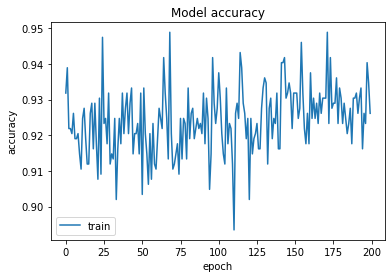

In [64]:
plt.plot(histupdated.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train'])


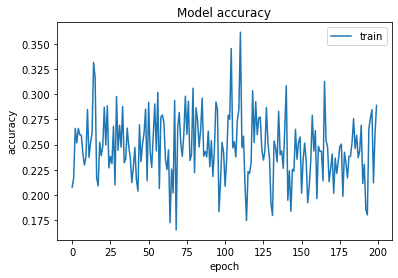

In [65]:
plt.plot(histupdated.history['loss'])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train'])